          x         y class
0  0.422221  0.545028    C1
1  0.369920  0.581177    C1
2  0.363025  0.581593    C1
3  0.333464  0.552323    C1
4  0.409722  0.550071    C1


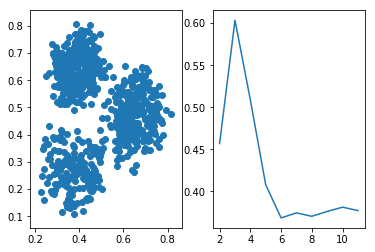

In [6]:
%matplotlib inline 
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import pandas as pd

# import data
data = pd.read_csv("three_class_data.csv", header=0)
print(data.head())


x = data[["x", "y"]]

# build up model
score = []


for i in range(10):
    model = k_means(x, n_clusters=i + 2)
    score.append(silhouette_score(x, model[1]))

plt.subplot(1, 2, 1)
plt.scatter(data['x'], data['y'])

plt.subplot(1, 2, 2)
plt.plot(range(2, 12, 1), score)
plt.show()



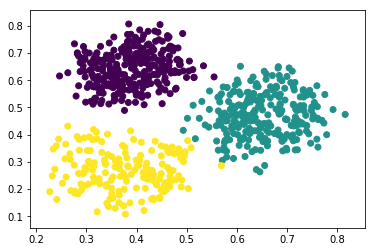

In [2]:
from sklearn.cluster import k_means
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# import data
data = pd.read_csv("three_class_data.csv", header=0)

x = data[["x", "y"]]

# build up model, n_clusters=3 from above observation
model = k_means(x, n_clusters=3)


plt.scatter(data['x'], data['y'], c=model[1])
plt.show()


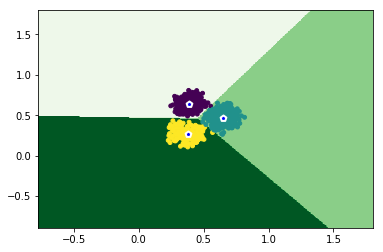

In [3]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("three_class_data.csv", header=0)

x = data[["x", "y"]]


model = KMeans(n_clusters=3)
model.fit(x)


# computing the boundary 
x_min, x_max = data['x'].min() - 1, data['x'].max() + 1
y_min, y_max = data['y'].min() - 1, data['y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

result = model.predict(np.c_[xx.ravel(), yy.ravel()])


result = result.reshape(xx.shape)

plt.contourf(xx, yy, result, cmap=plt.cm.Greens)

plt.scatter(data['x'], data['y'], c=model.labels_, s=15)


center = model.cluster_centers_
plt.scatter(center[:, 0], center[:, 1], marker='p', linewidths=2, color='b', edgecolors='w', zorder=20)
plt.show()


其他聚類演算法
除了我們會經常用到的 K-均值聚類演算法，Scikit-learn 還為我們提供了一些常見的聚類演算法。

Mini Batch K-Means Mini Batch K-Means 整體上和 K-Means 很相似，它是 K-Means 的一個變種形式。與 K-Means 不同的地方在於，其每次從全部資料集中抽樣小資料集進行反覆運算。Mini Batch K-Means 演算法在不對聚類效果造成較大影響的前提下，大大縮短了計算時間。

Affinity Propagation Affinity Propagation 又被稱為親和傳播聚類。Affinity Propagation 是基於資料點進行消息傳遞的理念設計的。與 K-Means 等聚類演算法不同的地方在於，親和傳播聚類不需要提前確定聚類的數量，即 K 值。但是運行效率較低。

Mean Shift MeanShift 又被稱為均值漂移聚類。Mean Shift 聚類的目的是找出最密集的區域， 同樣也是一個反覆運算過程。在聚類過程中，首先算出初始中心點的偏移均值，將該點移動到此偏移均值，然後以此為新的起始點，繼續移動，直到滿足最終的條件。Mean Shift 也引入了核函數，用於改善聚類效果。除此之外，Mean Shift 在圖像分割，視頻跟蹤等領域也有較好的應用。

Spectral Clustering Spectral Clustering 又被稱為譜聚類。譜聚類同樣也是一種比較常見的聚類方法，它是從圖論中演化而來的。譜聚類一開始將特徵空間中的點用邊連接起來。其中，兩個點距離越遠，那麼邊所對應的權值越低。同樣，距離越近，那麼邊對應的權值越高。最後，通過對所有特徵點組成的網路進行切分，讓切分後的子圖互相連接的邊權重之和盡可能的低，而各子圖內部邊組成的權值和經可能高，從而達到聚類的效果。譜聚類的好處是能夠識別任意形狀的樣本空間，並且可以得到全域最優解。

Agglomerative Clustering Agglomerative Clustering 又被稱為層次聚類。層次聚類演算法是將所有的樣本點自下而上合併組成一棵樹的過程，它不再產生單一聚類，而是產生一個聚類層次。層次聚類通過計算各樣本資料之間的距離來確定它們的相似性關係，一般情況下，距離越小九代表相似度越高。最後，將相似度越高的樣本歸為一類，依次反覆運算，直到生成一棵樹。由於層次聚類涉及到迴圈計算，所以時間複雜度比較高，運行速度較慢。

Birch Birch 是英文 Balanced Iterative Reducing and Clustering Using Hierarchies 的簡稱，它的中文譯名為「基於層次方法的平衡反覆運算規約和聚類」，名字實在太長。Birch 引入了聚類特徵樹（CF樹），先通過其他的聚類方法將其聚類成小的簇，然後再在簇間採用 CF 樹對簇聚類。Birch 的優點是，只需要單次掃描資料集即可完成聚類，運行速度較快，特別適合大資料集。

DBSCAN DBSCAN 是英文 Density-based spatial clustering of applications with noise 的簡稱，它的中文譯名為「基於空間密度與雜訊應用的聚類方法」，名字同樣很長。DBSCAN 基於密度概念，要求聚類空間中的一定區域內所包含的樣本數目不小於某一給定閾值。演算法運行速度快，且能夠有效處理特徵空間中存在的雜訊點。但是對於密度分佈不均勻的樣本集合，DBSCAN 的表現較差。


C:\Users\avrcounter\Anaconda3\lib\site-packages\sklearn\cluster\birch.py:629: UserWarning: Number of subclusters found (1) by Birch is less than (3). Decrease the threshold.
  % (len(centroids), self.n_clusters))


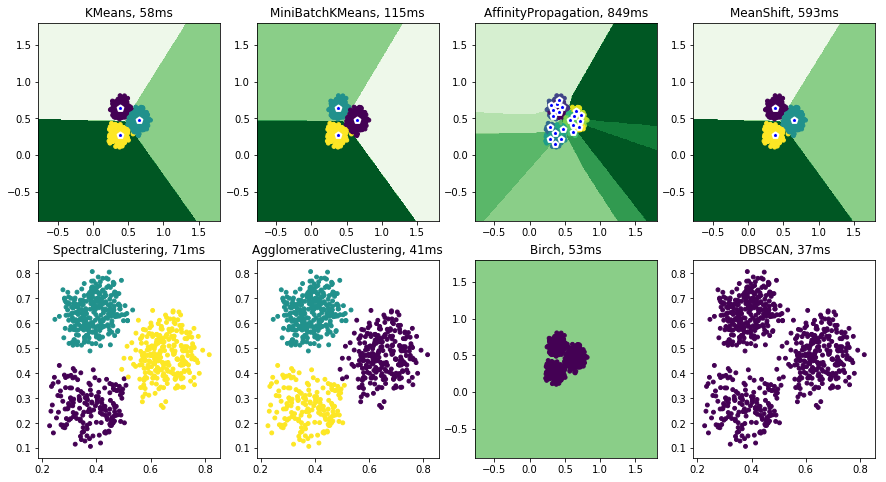

In [4]:
from sklearn import cluster
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time
plt.rcParams['figure.figsize'] = 15,8

# import data
data = pd.read_csv("three_class_data.csv", header=0)

x = data[["x", "y"]]

# labeling differnet methods
cluster_names = ['KMeans', 'MiniBatchKMeans', 'AffinityPropagation', 'MeanShift', 'SpectralClustering', 'AgglomerativeClustering', 'Birch', 'DBSCAN']

# define parameters for differnet methods
cluster_estimators = [
    cluster.KMeans(n_clusters=3),
    cluster.MiniBatchKMeans(n_clusters=3),
    cluster.AffinityPropagation(),
    cluster.MeanShift(),
    cluster.SpectralClustering(n_clusters=3),
    cluster.AgglomerativeClustering(n_clusters=3),
    cluster.Birch(n_clusters=3),
    cluster.DBSCAN()
]


plot_num = 1


for name, model in zip(cluster_names, cluster_estimators):

    tic = time.time()

    # buiding graph
    model.fit(x)

   
    plt.subplot(2, len(cluster_estimators) / 2, plot_num)

    
    x_min, x_max = data['x'].min() - 1, data['x'].max() + 1
    y_min, y_max = data['y'].min() - 1, data['y'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

    if hasattr(model, 'predict'):
        result = model.predict(np.c_[xx.ravel(), yy.ravel()])

        
        result = result.reshape(xx.shape)

        plt.contourf(xx, yy, result, cmap=plt.cm.Greens)

    plt.scatter(data['x'], data['y'], c=model.labels_, s=15)

    
    if hasattr(model, 'cluster_centers_'):
        center = model.cluster_centers_
        plt.scatter(center[:, 0], center[:, 1], marker='p', linewidths=2, color='b', edgecolors='w', zorder=20)

   
    toc = time.time()
    cluster_time = (toc - tic)*1000

  
    plt.title(str(name) + ", " + str(int(cluster_time)) + "ms")
    plot_num += 1

plt.show()


聚類演算法選擇
面對上面的對比結果，並不是某幾個演算法不好，而是每一種方法適用的情況都各不相同。下面，我們就簡單地說明一下，聚類演算法的選擇步驟：

1. 如果已知 K 值，即聚類的數量：

樣本數量 < 1 萬，首選 Kmeans，效果不好再選擇 SpectralClustering。
樣本數量 > 1 萬，首選 MiniBatch Kmeans。
2. 如果 K 值未知：

樣本數量 < 1 萬，首選 MeanShift。
樣本數量 > 1 萬，依靠經驗靈活應對了。
